Flipkart Sales Dataset

This project aims to optimize Flipkart’s sales performance by analyzing historical sales data using K-Means clustering and Linear Regression.

K-Means is used to segment customers based on purchasing behavior to identify high-value, loyal, and at-risk customers. Linear Regression is applied to forecast revenue and understand how demand factors like quantity and discounts impact sales.

The goal is to improve customer targeting, revenue prediction, pricing strategy, and overall profit optimization using data-driven insights.

In [1]:
import json

kaggle_dict = {
    "username": "riddhizunjarrao",
    "key": "KGAT_6cc40eb7ccf6521e2a4412babc8937b7"
}

with open("kaggle.json", "w") as f:
    json.dump(kaggle_dict, f)

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Python(15330) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(15334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(15336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [3]:
!pip install kaggle

Python(15337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [4]:
!kaggle datasets list

ref                                                                  title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
amar5693/screen-time-sleep-and-stress-analysis-dataset               Screen Time, Sleep & Stress Analysis Dataset            787136  2026-02-13 06:56:18.757000           6756        135                1  
amar5693/student-performance-dataset                                 Student Performance Dataset                             177286  2026-02-12 06:04:44.613000           5800         95                1  
algozee/heart-decices                                                Heart Disease Prediction Using Machine Learning       10070453  2026-02-22 17:32:58.757000            868      

In [4]:
!kaggle datasets download -d iyumrahul/flipkartsalesdataset

Python(15338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Dataset URL: https://www.kaggle.com/datasets/iyumrahul/flipkartsalesdataset
License(s): unknown
flipkartsalesdataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip flipkartsalesdataset.zip

Python(15373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Archive:  flipkartsalesdataset.zip
  inflating: Sales.csv               
  inflating: products.csv            


In [7]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Load dataset
df = pd.read_csv("Sales.csv", nrows=100000)
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,date_,city_name,order_id,cart_id,dim_customer_key,procured_quantity,unit_selling_price,total_discount_amount,product_id,total_weighted_landing_price
0,0,0,0,2022-04-01,Mumbai,112246974,173273802,17995199,1,234.0,0.0,344107,202.513030
1,1,1,1,2022-04-01,Bengaluru,112246976,173273597,18259433,1,64.0,0.0,389676,48.714375
2,2,2,2,2022-04-01,Bengaluru,112247019,173123717,5402601,1,1031.0,0.0,39411,975.996000
3,3,3,3,2022-04-01,HR-NCR,112247045,172547459,15649744,1,57.0,0.0,369742,25.000000
4,4,4,4,2022-04-01,Mumbai,112247123,173081820,10127605,2,30.0,0.0,12872,57.980004




```
Data Cleaning & Preprocessing
```



In [9]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0.2                  100000 non-null  int64  
 1   Unnamed: 0.1                  100000 non-null  int64  
 2   Unnamed: 0                    100000 non-null  int64  
 3   date_                         100000 non-null  str    
 4   city_name                     100000 non-null  str    
 5   order_id                      100000 non-null  int64  
 6   cart_id                       100000 non-null  int64  
 7   dim_customer_key              100000 non-null  int64  
 8   procured_quantity             100000 non-null  int64  
 9   unit_selling_price            100000 non-null  float64
 10  total_discount_amount         100000 non-null  float64
 11  product_id                    100000 non-null  int64  
 12  total_weighted_landing_price  99992 non-null   float64
d

Unnamed: 0.2                    0
Unnamed: 0.1                    0
Unnamed: 0                      0
date_                           0
city_name                       0
order_id                        0
cart_id                         0
dim_customer_key                0
procured_quantity               0
unit_selling_price              0
total_discount_amount           0
product_id                      0
total_weighted_landing_price    8
dtype: int64

In [12]:
df.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df.head()

,date_,city_name,order_id,cart_id,dim_customer_key,procured_quantity,unit_selling_price,total_discount_amount,product_id,total_weighted_landing_price
0,2022-04-01,Mumbai,112246974,173273802,17995199,1,234.0,0.0,344107,202.513030
1,2022-04-01,Bengaluru,112246976,173273597,18259433,1,64.0,0.0,389676,48.714375
2,2022-04-01,Bengaluru,112247019,173123717,5402601,1,1031.0,0.0,39411,975.996000
3,2022-04-01,HR-NCR,112247045,172547459,15649744,1,57.0,0.0,369742,25.000000
4,2022-04-01,Mumbai,112247123,173081820,10127605,2,30.0,0.0,12872,57.980004


In [13]:
df['date_'] = pd.to_datetime(df['date_'])

df['Year'] = df['date_'].dt.year
df['Month'] = df['date_'].dt.month
df['Day'] = df['date_'].dt.day

In [14]:
df.rename(columns={
    'procured_quantity':'Quantity',
    'unit_selling_price':'Selling_Price',
    'total_discount_amount':'Discount',
    'total_weighted_landing_price':'Landing_Price'
}, inplace=True)

In [15]:
# Create Revenue Column
df['Revenue'] = df['Quantity'] * df['Selling_Price']
df.head()

,date_,city_name,order_id,cart_id,dim_customer_key,Quantity,Selling_Price,Discount,product_id,Landing_Price,Year,Month,Day,Revenue
0,2022-04-01,Mumbai,112246974,173273802,17995199,1,234.0,0.0,344107,202.513030,2022,4,1,234.0
1,2022-04-01,Bengaluru,112246976,173273597,18259433,1,64.0,0.0,389676,48.714375,2022,4,1,64.0
2,2022-04-01,Bengaluru,112247019,173123717,5402601,1,1031.0,0.0,39411,975.996000,2022,4,1,1031.0
3,2022-04-01,HR-NCR,112247045,172547459,15649744,1,57.0,0.0,369742,25.000000,2022,4,1,57.0
4,2022-04-01,Mumbai,112247123,173081820,10127605,2,30.0,0.0,12872,57.980004,2022,4,1,60.0


Exploratory Data Analysis (EDA)

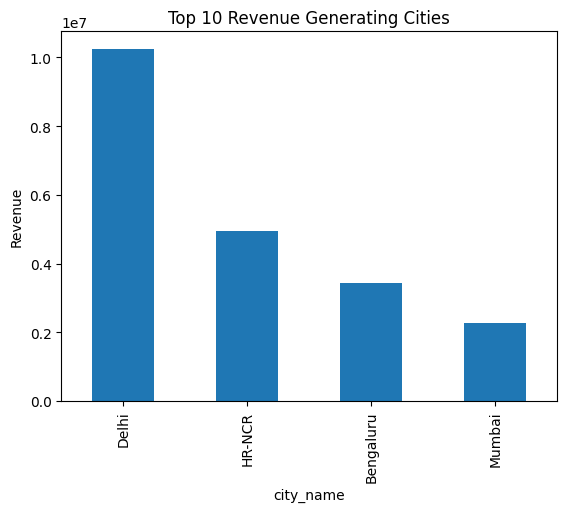

In [16]:
# Revenue by City
df.groupby('city_name')['Revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Revenue Generating Cities")
plt.ylabel("Revenue")
plt.show()

In [ ]:
# Business Insight:

# High revenue cities indicate strong demand concentration.
# Inventory and supply chain optimization should focus on these regions.

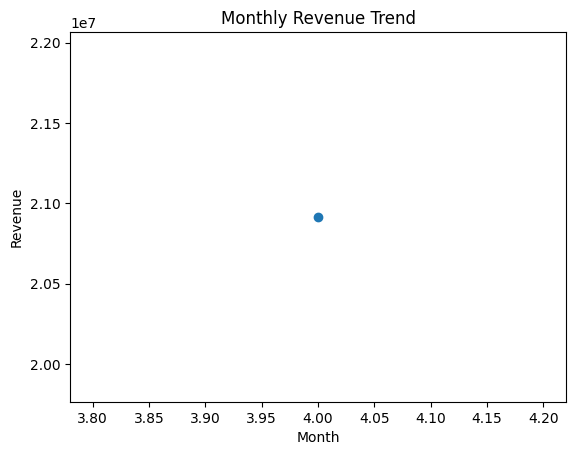

In [17]:
# Monthly Revenue Trend
df.groupby('Month')['Revenue'].sum().plot(marker='o')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()

In [ ]:
# Business Insight:

# Seasonal peaks suggest demand fluctuations.
# Companies can use this for demand forecasting and stock optimization.

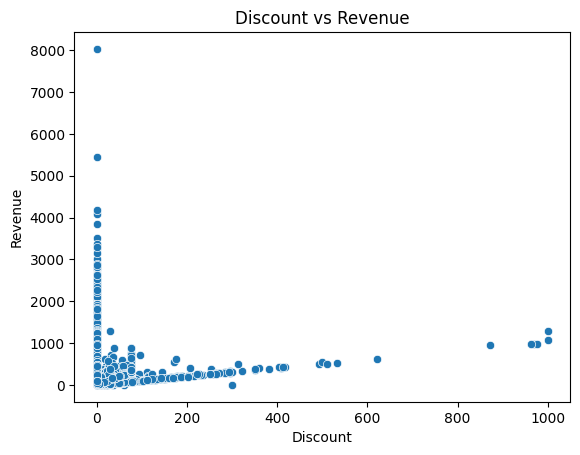

In [18]:
# Discount vs Revenue
sns.scatterplot(x='Discount', y='Revenue', data=df)
plt.title("Discount vs Revenue")
plt.show()

In [ ]:
# Economic Interpretation:

# If revenue increases with discount → demand is price elastic.
# Heavy discounts may increase volume but reduce profit margin.

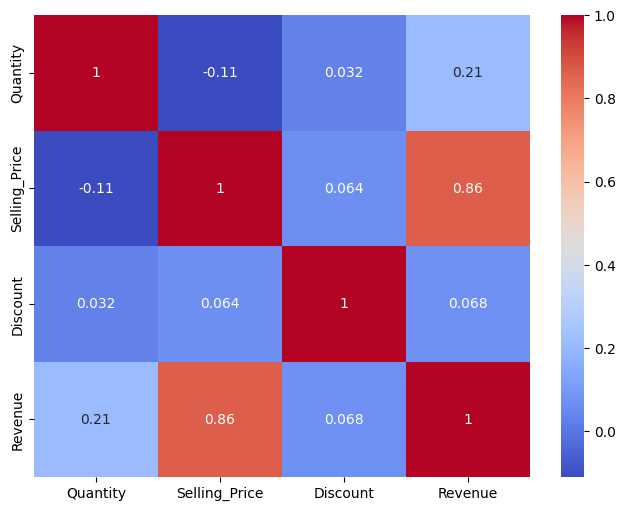

In [27]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Quantity','Selling_Price','Discount','Revenue']].corr(),
            annot=True, cmap='coolwarm')
plt.show()

Implementation of K-Means Algorithm

In [20]:
customer_df = df.groupby('dim_customer_key').agg({
    'Quantity':'sum',
    'Revenue':'sum',
    'Discount':'sum',
    'order_id':'nunique'
}).reset_index()

customer_df.rename(columns={'order_id':'Total_Orders'}, inplace=True)
customer_df.head()

,dim_customer_key,Quantity,Revenue,Discount,Total_Orders
0,189,7,567.0,0.0,2
1,234,1,16.0,0.0,1
2,257,1,16.0,0.0,1
3,263,1,300.0,0.0,1
4,298,2,70.0,0.0,1


In [21]:
X = customer_df[['Quantity','Revenue','Discount','Total_Orders']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

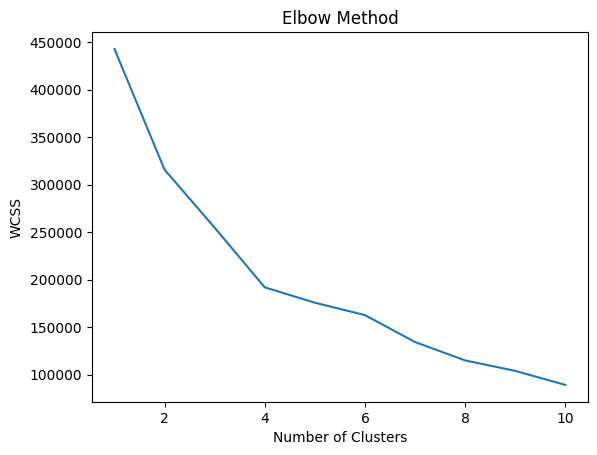

In [22]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(X_scaled)

customer_df.head()

,dim_customer_key,Quantity,Revenue,Discount,Total_Orders,Cluster
0,189,7,567.0,0.0,2,1
1,234,1,16.0,0.0,1,0
2,257,1,16.0,0.0,1,0
3,263,1,300.0,0.0,1,0
4,298,2,70.0,0.0,1,0


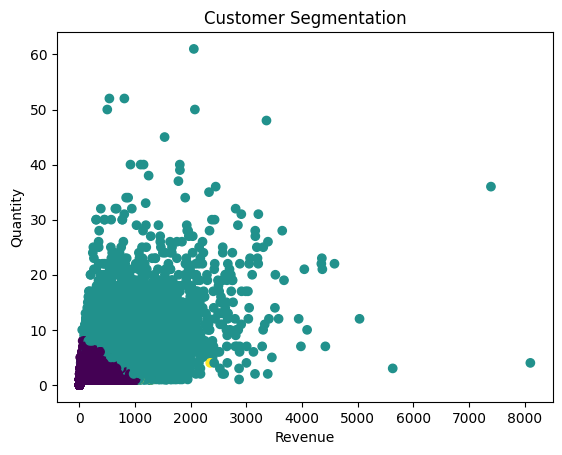

In [24]:
plt.scatter(customer_df['Revenue'], customer_df['Quantity'],
            c=customer_df['Cluster'])
plt.xlabel("Revenue")
plt.ylabel("Quantity")
plt.title("Customer Segmentation")
plt.show()

In [34]:
customer_df.groupby('Cluster').mean()

,dim_customer_key,Quantity,Revenue,Discount,Total_Orders
Cluster,,,,,
0,1.028121e+07,1.772184,134.029811,0.718289,1.000257
1,9.415201e+06,5.631211,481.715663,0.560643,1.791279
2,7.103830e+06,4.407407,737.555556,693.333333,1.296296


In [ ]:
# Interpretation Example:

# Cluster 0 → Low revenue customers (price sensitive)

# Cluster 1 → Medium customers (stable demand)

# Cluster 2 → High revenue customers (premium segment)

# Economic Link:

# Supports Market Segmentation Theory

# High-value cluster likely follows Pareto Principle (80/20 rule)

# Enables targeted pricing strategy and loyalty programs

Implementation of Linear Regression Model

In [25]:
X = df[['Quantity','Discount','Month']]
y = df['Revenue']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [28]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.04477767756297524
RMSE: 135.64796578707058


In [ ]:
# Business Interpretation of Regression Results
# If R² is high (e.g., >0.8):

# Quantity strongly determines revenue.

# Discount impacts purchasing behavior.

# Seasonal trends affect sales performance.